### Pandas DataFrame
- It is an equvivalant of excel of sql table in pandas
- it is a collection of series
- It has two axes row and column. row axes is denoted by 0 and column axes is denoted by 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Creating of a dataframe

In [3]:
# create a dataframe
df = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [10, 20, 30, 40],
    'C': [100, 200, 300, 400]
})

# print the dataframe
print(df)

# creating a dataframe by reading a csv file
df = pd.read_csv('/Users/anand/learning/python/pylearn/notebooks/datascience/pandas/oil.csv',)
# removing rows with missing values
df.dropna(inplace=True)
df.shape
# verifying that there is no missing value in the dataframe
df.isna().sum()
print(df.count())
print("good oil")
good_oil = df.where(lambda x: x.dcoilwtico >= 50.0).dropna()
print(good_oil.count())

bad_oil = df.where(lambda x: x.dcoilwtico < 50.0).dropna()
print("bad oil")
print(bad_oil.count())

print("mean of good oil")
newDf = good_oil.drop(columns=['date'], axis=1)
print(newDf.mean())

   A   B    C
0  1  10  100
1  2  20  200
2  3  30  300
3  4  40  400
date          1175
dcoilwtico    1175
dtype: int64
good oil
date          694
dcoilwtico    694
dtype: int64
bad oil
date          481
dcoilwtico    481
dtype: int64
mean of good oil
dcoilwtico    84.203487
dtype: float64


properties of a dataframe

In [4]:
# properties of the dataframe
print(f'shape: {df.shape}')
print(f'columns: {df.columns}')
print(f'index: {df.index}')
print(f'dtypes: {df.dtypes}')
print(f'axeses: {df.axes}')
# print("First 2 rows")
# print(df.head(2))
# print("Last 2 rows")
# print(df.tail(2))
# print("random 2 samples")
# print(df.sample(2))
print("Info")
print(df.info(show_counts=True))
print("statistics about the data")
print(df.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], include='all').round())


shape: (1175, 2)
columns: Index(['date', 'dcoilwtico'], dtype='object')
index: Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217],
           dtype='int64', length=1175)
dtypes: date           object
dcoilwtico    float64
dtype: object
axeses: [Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217],
           dtype='int64', length=1175), Index(['date', 'dcoilwtico'], dtype='object')]
Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1175 entries, 1 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1175 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 27.5+ KB
None
statistics about the data
              date  dcoilwtico
count   

In [5]:
# df columns can be accessed using the dot notation as well
# column names should follow the python variable naming rules for the dot notation to work
stores_df = pd.read_csv('/Users/anand/learning/python/pylearn/notebooks/datascience/pandas/stores.csv')
print(stores_df.head(2))

# you can also slice the df using the column names
subStoresdf = stores_df[['store_nbr', 'cluster']].iloc[0:5]
print(subStoresdf.head(2))

# you can rename the columns by modifying the columns attribute
stores_df.columns = ['store_number', 'City_name', 'state', 'store_type', 'cluster']
print(stores_df.head(2))

# you can also rename the columns using the rename method
stores_df.rename(columns={'store_number': 'store_nbr', 'City_name': 'city'}, inplace=True)
print(stores_df.head(2))

# iloc for df
# iloc is used to access the rows and columns by their integer index
# iloc[row_index, column_index]
# iloc is exclusive of the end index
print(stores_df.iloc[0:2, 0:2])
# loc is used to access the rows and columns by their labels
# loc[row_label, column_label]
# loc is inclusive of the end index
print(stores_df.loc[0:2, 'store_nbr':'state'])

# drop columns
# drop columns using the drop method
# drop method returns a new df with the columns dropped
# to drop the columns in place, use the inplace parameter
stores_df.drop(columns=['state', 'store_type'], inplace=True)
print(stores_df.head(2))
# droppping first 10 rows
# generally rows are dropped using slicing
stores_df.drop(range(10), axis= 0, inplace=True)
# duplicate the last row
stores_df = pd.concat([stores_df, stores_df.tail(1)])
print(stores_df.shape)

# the way to find duplicate rows is to use the duplicated method
# this will return a boolean series
# the first occurrence of the row is marked as False and the subsequent occurrences are marked as True
# to get the duplicate rows, you can use the boolean series to filter the rows
# this will return all the duplicate rows
print(stores_df.duplicated())

# identifying and dropping duplicate rows
# duplicated method returns a boolean series
# drop_duplicates method returns a new df with the duplicate rows removed
# to drop the duplicates in place, use the inplace parameter
# by default it remove the duplicates based on all the columns
# to remove duplicates based on specific columns, use the subset parameter
# this will remove the duplicates based on the store_nbr and city columns
stores_df.drop_duplicates(subset=['store_nbr', 'city'],keep='last', inplace=True)
print(stores_df.shape)

# finding unique values
# nunique method returns the number of unique values
print(stores_df.nunique())

   store_nbr   city      state type  cluster
0          1  Quito  Pichincha    D       13
1          2  Quito  Pichincha    D       13
   store_nbr  cluster
0          1       13
1          2       13
   store_number City_name      state store_type  cluster
0             1     Quito  Pichincha          D       13
1             2     Quito  Pichincha          D       13
   store_nbr   city      state store_type  cluster
0          1  Quito  Pichincha          D       13
1          2  Quito  Pichincha          D       13
   store_nbr   city
0          1  Quito
1          2  Quito
   store_nbr   city      state
0          1  Quito  Pichincha
1          2  Quito  Pichincha
2          3  Quito  Pichincha
   store_nbr   city  cluster
0          1  Quito       13
1          2  Quito       13
(45, 3)
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26  

In [6]:
# Filtering frame values
# filtering the rows based on a condition
# the condition should be a boolean series
# Filtering a single row using loc function
print(stores_df.head(2))
print(stores_df.loc[stores_df.store_nbr == 11, ['store_nbr', 'city']]) # loc also takes a projection of columns
# Filtering multiple rows using loc function
print(stores_df.loc[stores_df.store_nbr.isin([11, 12]), ['store_nbr', 'city']])
# Filtering the rows based on multiple conditions
# the conditions should be combined using the bitwise operators
# the conditions should be enclosed in parentheses
cond = (stores_df.store_nbr == 11) | (stores_df.store_nbr == 12)
print(stores_df.loc[cond, ['store_nbr', 'city']])

# filter using where method
# where method returns a new df with the rows that satisfy the condition
# the rows that do not satisfy the condition are replaced with NaN
# to drop the rows that do not satisfy the condition, use the dropna method
print(stores_df.where(stores_df.store_nbr > 20).dropna().count())

# sorting the data frame
# sort_values method is used to sort the df
# by default the sorting is done in ascending order
stores_df.sort_values(by=['store_nbr'], ascending=False, inplace=True)

# airthmatic column creation
# you can create a new column by performing arithmetic operations on the existing columns
stores_df['new_column'] = stores_df.store_nbr * 10

# map method
# a dict can be passed to the map method to create a new column
# stores_df['new_column'] = stores_df.store_nbr.map({11: 110, 12: 120})
stores_df['new_column'] = stores_df.store_nbr.map(lambda x: x * 100)

# apply method
stores_df['new_column'] = stores_df.apply(lambda x: x.store_nbr * 100, axis=1)
print(stores_df.head(2))

    store_nbr       city  cluster
10         11    Cayambe        6
11         12  Latacunga       15
    store_nbr     city
10         11  Cayambe
    store_nbr       city
10         11    Cayambe
11         12  Latacunga
    store_nbr       city
10         11    Cayambe
11         12  Latacunga
store_nbr    34
city         34
cluster      34
dtype: int64
    store_nbr       city  cluster  new_column
53         54  El Carmen        3        5400
52         53      Manta       13        5300


### Catagorical data type
- what is the difference between the categorical data type and the object data type?
- the categorical data type is more memory efficient
- the categorical data type is faster than the object data type for certain operations
- It stores text data with repeating values as efficiently
- python maps each unique cataegory to an integer to save space
- As a rule of thumb only consider this data type when unique catagories < number of rows/2

In [7]:
cat_df = stores_df.sort_values(by=['store_nbr'], ascending=False)

# to convert a column to a categorical data type, use the astype method
stores_df['city'] = stores_df['city'].astype('category')
print(stores_df.dtypes)

store_nbr        int64
city          category
cluster          int64
new_column       int64
dtype: object


### Aggregating and Reshaping DataFrames

In [8]:
transactions_df = pd.read_csv('/Users/anand/learning/python/pylearn/notebooks/datascience/pandas/transactions.csv')
#transactions_df.info(memory_usage='deep')

# Reduce the memory usage of the dataframe
transactions_df['date'] = pd.to_datetime(transactions_df['date'])
transactions_df['store_nbr'] = transactions_df['store_nbr'].astype('int8')
transactions_df['transactions'] = transactions_df['transactions'].astype('int16')

#transactions_df.info(memory_usage='deep')

# Find the transactions done by each store in each year
# Adding year column to the dataframe
transactions_df['year'] = transactions_df['date'].dt.year
# you can aggregate the dataframe columns by using the aggregation methods
# group store numbers by transactions
# as_index=False will not make the multi-level index
by_tran_df = transactions_df.groupby(['store_nbr',
                                       'year'], as_index=False,
                                         dropna=True).agg({'transactions': 'sum'}).sort_values(by=['transactions'],
                                                                                                ascending=False)
# by_tran_df_another_way = transactions_df.groupby(['store_nbr'], dropna=True)['transactions'].sum()

# using multi-index aggregation
by_tran_multi_df = transactions_df.groupby(['store_nbr',
                                      'year'],
                                     dropna=True).agg({'transactions': 'sum'}).sort_values(by=['transactions'],
                                                                                           ascending=False)
#print(by_tran_multi_df.loc[(44, 2014),:])

store_tran_df = pd.read_csv(
    '/Users/anand/learning/python/pylearn/notebooks/datascience/pandas/project_transactions.csv',)
print(store_tran_df.head(2))
# What is total and mean discount for each store in each week?
# this will create multi-index columns
disc_df = store_tran_df.groupby(['STORE_ID', 'WEEK_NO'],dropna=True).agg({
    'COUPON_DISC': ['sum', 'mean']})

print(disc_df.head(2))
# dropping the coupon_disc index column
disc_df = disc_df.droplevel(0, axis=1)
print(disc_df.head(5))

# you can also use tubles in the agg method to specify the column and the aggregation function
# In this case multi-index will not be created and there is no need to drop it.
disc_df = store_tran_df.groupby(
    ['STORE_ID', 'WEEK_NO'], dropna=True).agg(disc_sum=('COUPON_DISC', 'sum'), disc_mean=('COUPON_DISC', 'mean'))

# pivot table
# They are good for creating summary of the data
# pivot_table method is used to create a pivot table
# use case: find the total discount for each store in each week
# Adding margin=True will add a new column that will contains the row and column level statistics
pv_df = store_tran_df.pivot_table(index='STORE_ID', columns='WEEK_NO', values='COUPON_DISC', aggfunc='sum',margins=True)
print(pv_df.dropna().shape)

# Melting dataframes
# melt method is used to unpivot the dataframes
# it converts columns into rows. This is great for turning wide dataframes into long dataframes
melting_df = store_tran_df.melt(id_vars=['STORE_ID', 'WEEK_NO'], value_vars=['COUPON_DISC', 'COUPON_MATCH_DISC'])
print(melting_df.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/anand/learning/python/pylearn/notebooks/datascience/pandas/project_transactions.csv'

### Visualisation

Legend


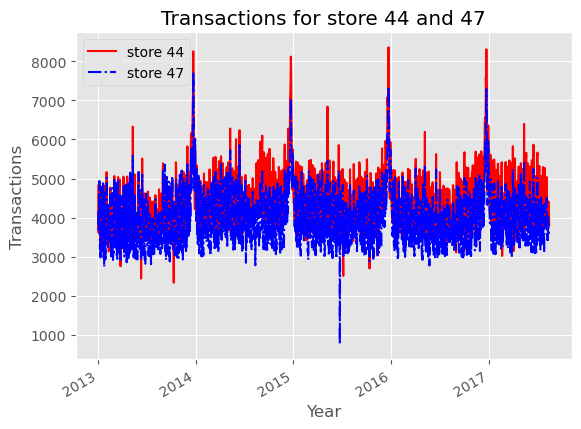

In [ ]:
transactions_df = pd.read_csv('/Users/anand/learning/python/pylearn/notebooks/datascience/pandas/transactions.csv', parse_dates=['date'])
#transactions_df.set_index('date').loc['2013-01', 'transactions'].plot()
# transactions_df.plot(x='date', y='transactions')
#transactions_df_44 = transactions_df.loc[transactions_df.store_nbr == 44, ['date', 'transactions']]
#transactions_df_44.set_index('date').plot()

# title='Transactions for store 44 and 47', -> title of the plot
# xlabel='Year', -> x-axis label
# ylabel='Transactions', -> y-axis label
#     color=['red', 'blue'], style=['-', '-.'] -> color and style of the lines
# legend=True -> show the legend
# loc='best' -> location of the legend
# bbox_to_anchor=(1.05, 1) -> To set the custom location of the legend
# we can set the template for the chart globally
plt.style.use('ggplot')
# seaborn can also be used to set the style
trans_44_47 = transactions_df.where((transactions_df.store_nbr == 44) | (transactions_df.store_nbr == 47)).dropna(
).pivot_table(index='date',
               columns='store_nbr',
                 values='transactions',
                   aggfunc='sum').dropna().plot(title='Transactions for store 44 and 47',
                                                                                        xlabel='Year',
                                                                                        ylabel='Transactions',
                                                                                            color=['red', 'blue'],
                                                                                              style=['-', '-.'],
                                                                                                legend=True).legend(['store 44', 'store 47'],loc='best')

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

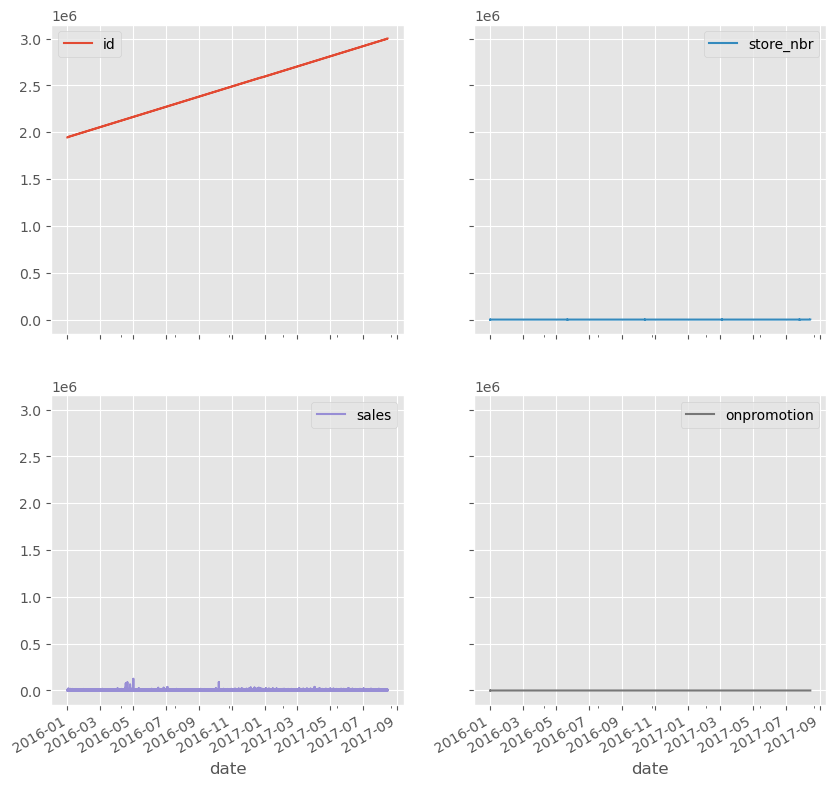

In [ ]:
# subplots: alloes to create multiple plots in a single figure
sales_df = pd.read_csv(
    '/Users/anand/learning/python/pylearn/notebooks/datascience/pandas/retail_2016_2017.csv', parse_dates=['date'])
# layout=(2, 2) -> 2 rows and 2 columns
# sharex=True -> share the x-axis
# sharey=True -> share the y-axis
# figsize=(10, 10) -> size of the figure
# subplots=True -> create subplots
sales_df.set_index('date').plot(subplots=True, layout=(2, 2),sharey=True, figsize=(10, 10))

<Axes: title={'center': 'Total transactions for stores in 40s'}, xlabel='Store Number', ylabel='Transactions'>

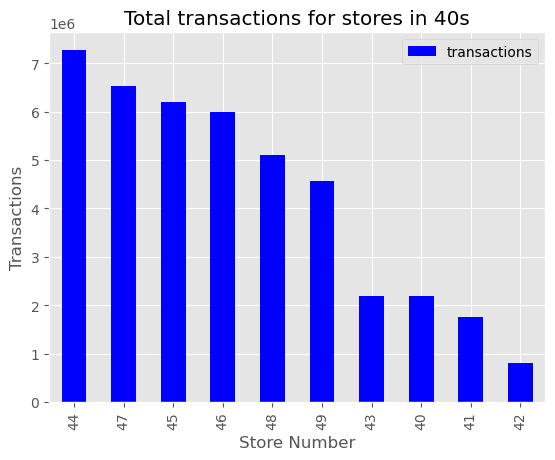

In [ ]:
# Bar charts
# bar chart is used to show the comparison between the categories
# compare the sales for store number 44 and 47
# you need to specify kind=bar in the plot method or plot.bar method barh to make the bar plot horizontal
store_in_40s = list(range(40, 50))
transactions_df.query('store_nbr in @store_in_40s').dropna().groupby('store_nbr').agg(
    {'transactions': 'sum'}).sort_values(by='transactions', ascending=False).plot.bar(xlabel='Store Number',
                                                                      ylabel='Transactions',
                                                                        title='Total transactions for stores in 40s', color='blue')

<Axes: xlabel='store_nbr'>

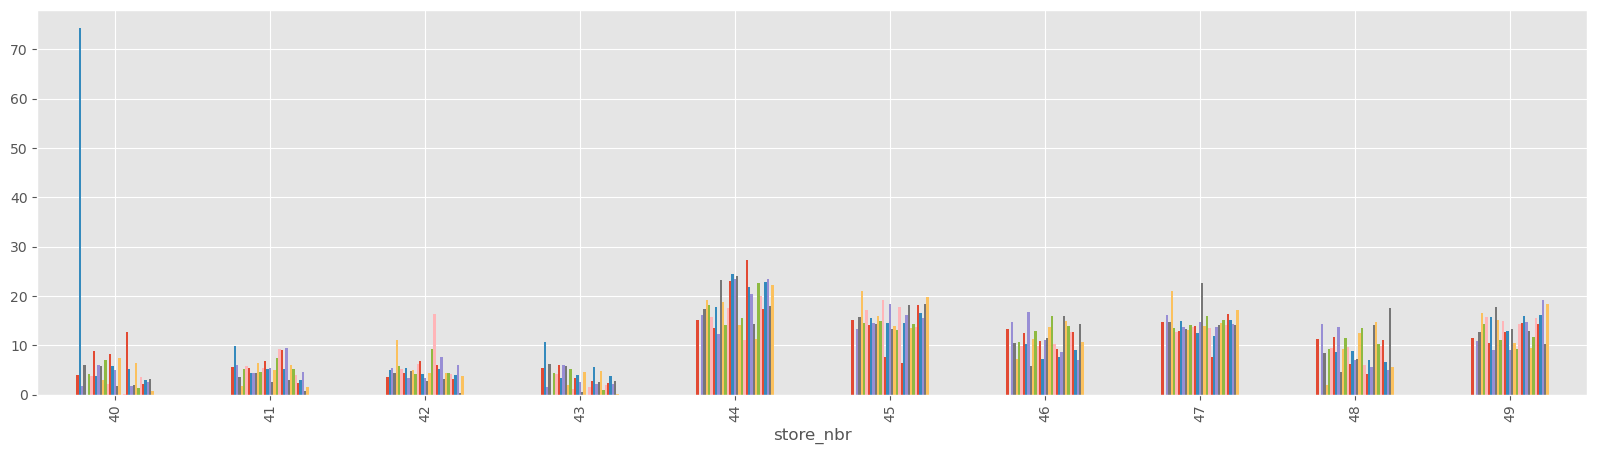

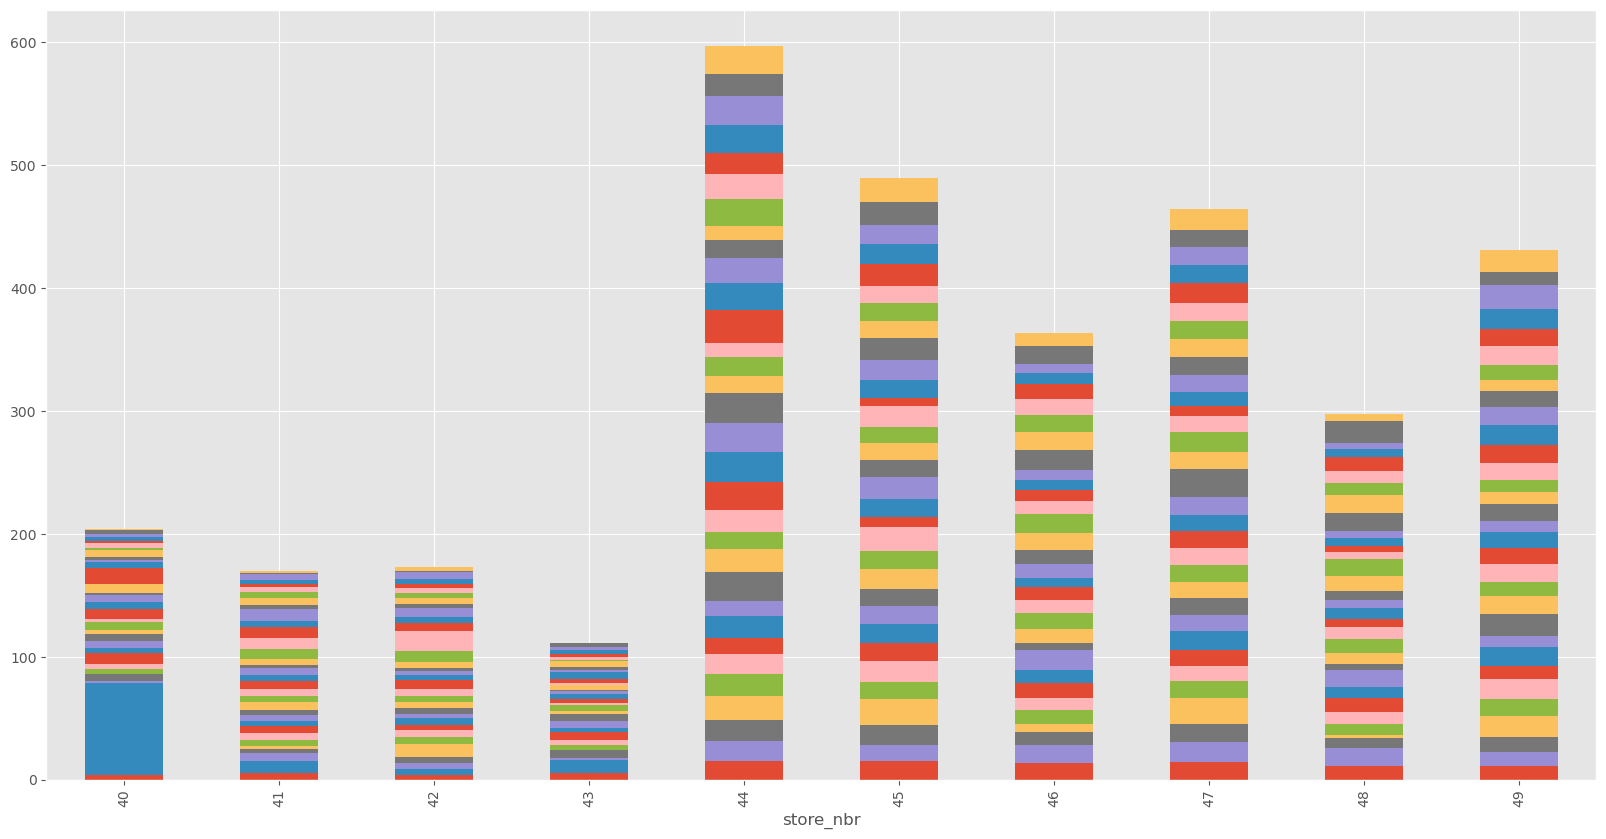

In [ ]:
# groupd and stacked bar charts
# set pandas to display the numbers in regular format
sales_df.query('store_nbr in @store_in_40s').dropna().pivot_table(index='store_nbr', values='sales',
                                                                  columns='family', aggfunc='sum').apply(lambda x: x * 100/sum(x)).plot.bar(legend=False, figsize=(20, 5))
# Now stacking the bar chart with different family
sales_df.query('store_nbr in @store_in_40s').dropna().pivot_table(index='store_nbr',
                                                                   values='sales',
                                                                   columns='family',
                                                                  aggfunc='sum').apply(lambda x: x * 100/sum(x)).plot.bar(legend=False,
                                                                                                                           figsize=(20, 10),
                                                                                                                             stacked=True)

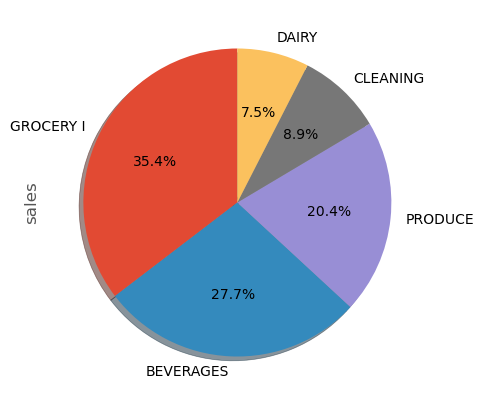

In [ ]:
# pie chart
# pie chart is used to show the proportion of the categories
# compare the sales for store number 44 and 47
# you need to specify kind=pie in the plot method
# autopct='%1.1f%%' -> to show the percentage on the pie chart
# shadow=True -> to add shadow to the pie chart
# startangle=90 -> to rotate the pie chart
# explode=(0.1, 0) -> to explode the first slice
# transactions_df.query('store_nbr in @store_in_40s').dropna().groupby('store_nbr').agg(
#     {'transactions': 'sum'}).sort_values(by='transactions', ascending=False).plot.pie(y='transactions',
#                                                                                       autopct='%1.1f%%',
#                                                                                         shadow=True,
#                                                                                           startangle=90, legend=False, figsize=(10, 10))
# find which family has the most sales out of beverages, alcohol, and grocery
sales_3_df = sales_df.query('store_nbr in @store_in_40s').dropna().groupby('family').agg({'sales': 'sum'}).sort_values(
    by='sales', ascending=False).iloc[0:5,:].plot.pie(y='sales',autopct='%1.1f%%',shadow=True,startangle=90, legend=False, figsize=(5, 5))
#sales_3_df

<Axes: title={'center': 'Store 44 vs 47 transactions'}, xlabel='Store 44 transactions', ylabel='Store 47 transactions'>

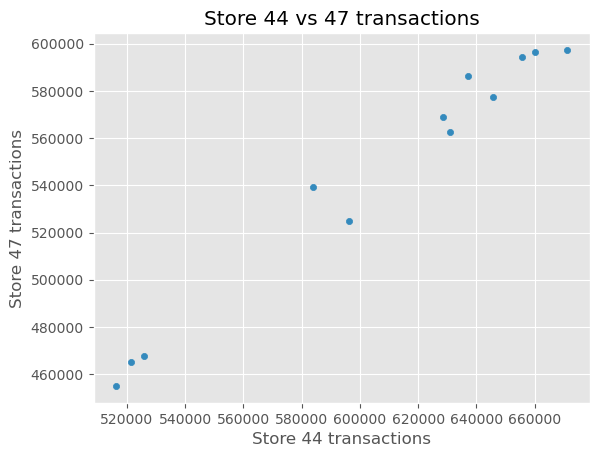

In [ ]:
# scatter plot
# scatter plot is used to show the relationship between two numerical variables
# compare the transactions for store number 44 and 47
# you need to specify kind=scatter in the plot method
(transactions_df.query('store_nbr in @store_in_40s')
.pivot_table(index=transactions_df.date.dt.month, columns='store_nbr', values='transactions', aggfunc='sum')
.plot.scatter(x=44, y=47, title='Store 44 vs 47 transactions', xlabel='Store 44 transactions', ylabel='Store 47 transactions')
)


<Axes: ylabel='Frequency'>

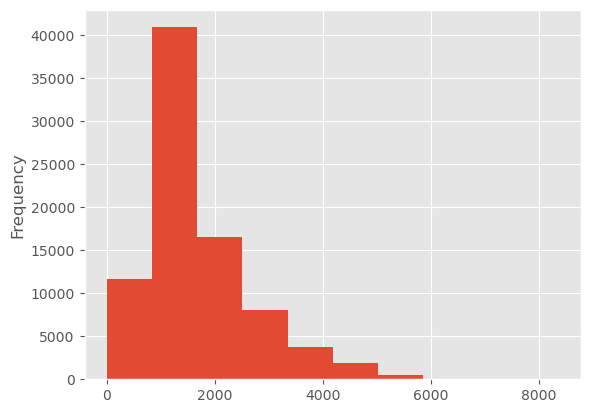

In [ ]:
# Histogram
# histogram is used to show the distribution of the numerical variable
# compare the transactions for store number 44 and 47
# you need to specify kind=hist in the plot method
# (
#     transactions_df.query('store_nbr in @store_in_40s')
#     .pivot_table(index='store_nbr', values='transactions', aggfunc='sum')
#     .plot.hist(bins=10, title='Transactions distribution for stores in 40s', xlabel='Transactions', ylabel='Frequency')
#  )
transactions_df.loc[:, 'transactions'].plot.hist()

In [ ]:
# Importing and exporting data
# read_csv method is used to read the csv file
# If a column name is not present in the csv then make the header=0 and pass a list of cols in the read_csv method
# use_cols -> the coulmns to be read for example there are 10 columns and you want to read only 5 columns
# names -> the names of the columns
# na_values -> the values that should be treated as missing values
# converters -> a dict that contains the column name and the function that should be applied to each value of the column
oils_df = pd.read_csv('/Users/anand/learning/python/pylearn/notebooks/datascience/pandas/oil.csv',
                       header=0,
                      names=['date', 'oil_pricess'], skiprows=[0], index_col='date', parse_dates=True, na_values=['.', 'NaN'], converters={'oil_pricess': lambda x: x if x !='NaN' else 0.0})
print(oils_df.dtypes)
print(oils_df.head(10))

oil_pricess    object
dtype: object
           oil_pricess
date                  
2013-01-02       93.14
2013-01-03       92.97
2013-01-04       93.12
2013-01-07        93.2
2013-01-08       93.21
2013-01-09       93.08
2013-01-10       93.81
2013-01-11        93.6
2013-01-14       94.27
2013-01-15       93.26


Reading from a text file
read_csv can be used with a custom delimiter

Reading from an excel file
read_excel method is used to read the excel file

to_csv and to_excel methods are used to write the dataframes to csv and excel files

- sqlAlchamy is used to connect to the sql database
- read_sql method is used to create a data frame from the sql query

In [10]:
# joining dataframes
# Appending Tables: stacks th rows from multiple data frames
# joining: add related columns from one data frame to another based on common values
# concat method is used to append the dataframes.
retail_16_17_df = pd.read_csv('/Users/anand/learning/python/pylearn/notebooks/datascience/pandas/retail_2016_2017.csv')
automitive_df = retail_16_17_df.query('family == "AUTOMOTIVE"')
beverages_df = retail_16_17_df.query('family == "BEVERAGES"')
# append the dataframes
# ignore_index=True will reset the index of the appended dataframe
appended_df = pd.concat([automitive_df, beverages_df], ignore_index=True)

# joining dataframes
# dfs should have a at least one common column to merge on
# syntax is left_df.merge(right_df, how='inner', left_on, right_on)
# how: inner, outer, left, right
# left_on: the column to join on the left dataframe
# right_on: the column to join on the right dataframe
# the default is inner join

joined_df = beverages_df.merge(
    transactions_df, how='inner', left_on='store_nbr', right_on='store_nbr', )
joined_df.head(10)

,id,date_x,store_nbr,family,sales,onpromotion,date_y,transactions,year
0,1945947,2016-01-01,1,BEVERAGES,0.0,0,2013-01-02,2111,2013
1,1945947,2016-01-01,1,BEVERAGES,0.0,0,2013-01-03,1833,2013
2,1945947,2016-01-01,1,BEVERAGES,0.0,0,2013-01-04,1863,2013
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,2013-01-05,1509,2013
4,1945947,2016-01-01,1,BEVERAGES,0.0,0,2013-01-06,520,2013
5,1945947,2016-01-01,1,BEVERAGES,0.0,0,2013-01-07,1807,2013
6,1945947,2016-01-01,1,BEVERAGES,0.0,0,2013-01-08,1869,2013
7,1945947,2016-01-01,1,BEVERAGES,0.0,0,2013-01-09,1910,2013
8,1945947,2016-01-01,1,BEVERAGES,0.0,0,2013-01-10,1679,2013
9,1945947,2016-01-01,1,BEVERAGES,0.0,0,2013-01-11,1813,2013
